In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
df = pd.read_csv('../input/movie-classifier/Multi_Label_dataset/train.csv')
df.shape

(7254, 27)

In [4]:
img_folder = '../input/movie-classifier/Multi_Label_dataset/Images/'

In [5]:
class ImageDataset(Dataset):
  
  def __init__(self,csv,img_folder,transform):
    self.csv=csv
    self.transform=transform
    self.img_folder=img_folder
    
    self.image_names=self.csv[:]['Id']
    self.labels=np.array(self.csv.drop(['Id', 'Genre'], axis=1))
  
  def __len__(self):
    return len(self.image_names)

  def __getitem__(self,index):
    
    image=cv2.imread(self.img_folder+self.image_names.iloc[index]+'.jpg')
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    image=self.transform(image)
    targets=self.labels[index]

    return (image,targets)

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.15)

In [7]:
len(train_set)

6165

In [8]:
len(test_set)

1089

In [9]:
train_transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((350, 350)),
                transforms.ToTensor()])

test_transform =transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((350, 350)),
                transforms.ToTensor()])

train_dataset=ImageDataset(train_set,img_folder,train_transform)
test_dataset=ImageDataset(test_set,img_folder,test_transform)

In [10]:
img,labels = train_dataset.__getitem__(0)  #FOR PREVIEW - 2119 in TEST_DATASET(may change depending on splitting)
print(img.shape, labels)

torch.Size([3, 350, 350]) [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [11]:
num_classes = 25
batch_size = 33

In [12]:
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset, 
    batch_size=batch_size,
    shuffle=True
)

In [13]:
df

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_copy = df
image_dict = df_copy.drop(['Id', 'Genre'], axis=1)

In [15]:
d = {}

i = 0
for gen in image_dict.columns:

  d[i] = gen
  i+=1

In [16]:
d

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'N/A',
 16: 'News',
 17: 'Reality-TV',
 18: 'Romance',
 19: 'Sci-Fi',
 20: 'Short',
 21: 'Sport',
 22: 'Thriller',
 23: 'War',
 24: 'Western'}

In [17]:
dataiter = iter(train_dataloader)
images,targets = dataiter.next()

In [18]:
print(images.shape)

torch.Size([33, 3, 350, 350])


In [19]:
print(images[1].shape)

torch.Size([3, 350, 350])


In [20]:
print(targets[0])

tensor([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])


Action
Thriller


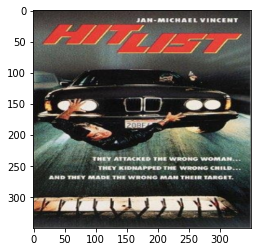

In [21]:
def show_example(img, label,d):

    for index in range(len(labels)):

      if(labels[index]==1):
        print(d[index])
        
    plt.imshow(img.permute(1, 2, 0))
  
show_example(img,labels,d)

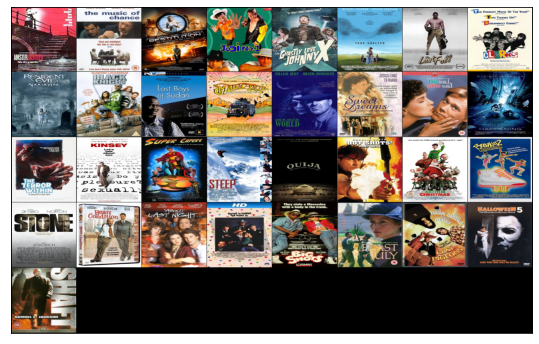

In [22]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break
        
show_batch(train_dataloader)

In [23]:
from torchvision import models
import torch.nn as nn
import copy

In [24]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

In [25]:
for param in inception.parameters():
    param.requires_grad = False

In [26]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [27]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([25, 768])
torch.Size([25])


In [28]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [29]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([25, 768])
torch.Size([25])
torch.Size([25, 2048])
torch.Size([25])


In [30]:
inception = inception.to(device)
opt = optim.Adam(inception.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

In [31]:
print(len(test_dataset))

1089


In [32]:
def evaluation(dataloader, model):
    
    total, correct = 0, 0
    count = 0
    
    for data in dataloader:
        
        count+=1

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        outputs = torch.sigmoid(outputs.logits)

        kvals, kidx = outputs.topk(3, dim=1)
        outputs.zero_()
        outputs[torch.arange(outputs.size(0))[:, None], kidx] = 1
        
        #print("PREDICTED OUTPUTS: ",outputs)
        #print("LABELS :", labels)


        for i,j in zip(outputs,labels):
          
          for x in range(len(i)):
            
            if(j[x]==1):
              total+=1

              if(i[x]==1 and j[x]==1):
                correct += 1

          #print ("PRED:",(i == 1).nonzero(as_tuple=True)[0])
          #print ("LABEL:",(j == 1).nonzero(as_tuple=True)[0])
          
        #print("DEBUG:",100*correct/total)
        
        #total += labels.size(0)
        #correct += (outputs == labels).sum().item()
    
    print("CORRECT:",correct)
    print("TOTAL:",total)
    return (100*correct/total)

CORRECT: 1226
TOTAL: 2508
CORRECT: 6895
TOTAL: 14366
Epoch: 0/20, Test acc: 48.88, Train acc: 48.00
CORRECT: 1273
TOTAL: 2508
CORRECT: 7082
TOTAL: 14366
Epoch: 1/20, Test acc: 50.76, Train acc: 49.30
CORRECT: 1306
TOTAL: 2508
CORRECT: 7269
TOTAL: 14366
Epoch: 2/20, Test acc: 52.07, Train acc: 50.60
CORRECT: 1310
TOTAL: 2508
CORRECT: 7293
TOTAL: 14366
Epoch: 3/20, Test acc: 52.23, Train acc: 50.77
CORRECT: 1324
TOTAL: 2508
CORRECT: 7520
TOTAL: 14366
Epoch: 4/20, Test acc: 52.79, Train acc: 52.35
CORRECT: 1327
TOTAL: 2508
CORRECT: 7531
TOTAL: 14366
Epoch: 5/20, Test acc: 52.91, Train acc: 52.42
CORRECT: 1345
TOTAL: 2508
CORRECT: 7579
TOTAL: 14366
Epoch: 6/20, Test acc: 53.63, Train acc: 52.76
CORRECT: 1374
TOTAL: 2508
CORRECT: 7705
TOTAL: 14366
Epoch: 7/20, Test acc: 54.78, Train acc: 53.63
CORRECT: 1368
TOTAL: 2508
CORRECT: 7749
TOTAL: 14366
Epoch: 8/20, Test acc: 54.55, Train acc: 53.94
CORRECT: 1359
TOTAL: 2508
CORRECT: 7865
TOTAL: 14366
Epoch: 9/20, Test acc: 54.19, Train acc: 54.75


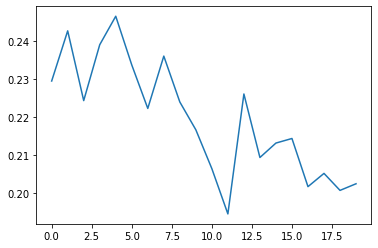

In [33]:
loss_arr = []
loss_epoch_arr = []
max_epochs = 20

min_loss = 1000

n_iters = np.ceil(len(train_dataset)/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_dataloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = inception(inputs)
        outputs = torch.sigmoid(outputs.logits)
        loss = loss_fn(outputs, labels.float())
        loss.backward()
        
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(inception.state_dict())
            
            loss_arr.append(min_loss)
        
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(test_dataloader, inception), evaluation(train_dataloader, inception)))
    
plt.plot(loss_epoch_arr)
plt.show()

#if i % 100 == 0:
            #print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
#print('Min loss %0.2f' % min_loss)          